In [43]:
#!conda install --name fastai -c mcs07 pubchempy -y

Solving environment: done

## Package Plan ##

  environment location: /home/jgmeyer2/anaconda3/envs/fastai

  added / updated specs: 
    - pubchempy


The following NEW packages will be INSTALLED:

    pubchempy:  1.0.4-py_2                           mcs07      

The following packages will be UPDATED:

    certifi:    2018.8.24-py36_1                     conda-forge --> 2018.8.24-py36_1001   conda-forge
    numpy-base: 1.14.3-py36hdbf6ddf_0                            --> 1.15.0-py36h3dfced4_0            

The following packages will be DOWNGRADED:

    blas:       1.1-openblas                         conda-forge --> 1.0-mkl                          
    numpy:      1.15.1-py36_blas_openblashd3ea46f_1  conda-forge [blas_openblas] --> 1.15.0-py36h1b885b7_0            
    scipy:      1.1.0-py36_blas_openblash7943236_201 conda-forge [blas_openblas] --> 1.1.0-py36hc49cb51_0             

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [70]:
from rdkit import Chem
from rdkit.Chem import Draw
import os
import glob
import numpy as np
import pandas as pd
import PIL
from random import sample
import csv
import pubchempy as pcp
import matplotlib.pyplot as plt
import bokeh
%matplotlib inline

# read pubchem CIDs from files

In [9]:
tables_list=glob.glob("../data/*.txt")
print(tables_list)
CID_dict = {}
cidslist = []
for table in tables_list:
    tableID = table.replace('.txt','')
    tableID = tableID.replace('../data/','')
    CID_dict[tableID] = []
    with open(table) as inf:
        for aline in inf.readlines():
            if aline.startswith('CID')==True:
                #cid = aline.replace('\n')
                CID_dict[tableID].append(aline.replace('\n','').replace('CID: ',''))
                

print(len(CID_dict[tableID]))
CID_dict.keys()
print(CID_dict[tableID][0])

['../data/gastrointestinal.txt', '../data/dermatologic.txt', '../data/urological.txt', '../data/cns.txt', '../data/antiinfective.txt', '../data/antineoplastic.txt', '../data/reproductivecontrol.txt', '../data/lipidregulating.txt', '../data/hematologic.txt', '../data/respiratorysystem.txt', '../data/cardio.txt', '../data/antiinflammatory.txt']
662
134715169


# get SMILES for CIDs

In [11]:
smiles_dict = {}

for key in CID_dict.keys():
    smiles_dict[key] = []
    prop_dict = pcp.get_properties('IsomericSMILES', CID_dict[key])
    for i in range(0, len(prop_dict)):
        smiles_dict[key].append(prop_dict[i]['IsomericSMILES'])

        #c = pcp.Compound.from_cid(v)
        #smiles_dict[key].append(c.isomeric_smiles)
                
print(prop_dict[i]["IsomericSMILES"])
print(len(smiles_dict[key]))


C1=CC(=C(C=C1C2C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
662


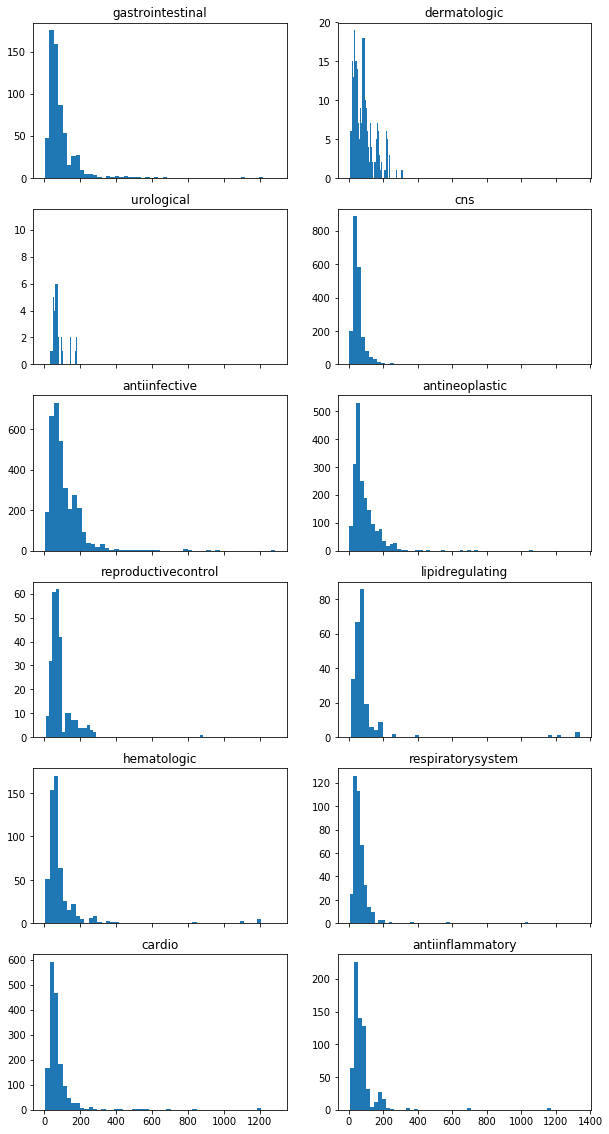

In [57]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 20),nrows=6, sharex ='col')
k = 0
keys = list(smiles_dict.keys())

for i in range(6):
    for j in range(2):
        smileslens = [len(i) for i in smiles_dict[keys[k]]]
        axs[i, j].hist(smileslens,bins=50)
        axs[i,j].set_title(str(keys[k]).format(i+1))
        k +=1

### re-do and only keep things with smiles length <200

In [58]:
smiles_dict = {}

for key in CID_dict.keys():
    smiles_dict[key] = []
    prop_dict = pcp.get_properties('IsomericSMILES', CID_dict[key])
    for i in range(0, len(prop_dict)):
        if len(prop_dict[i]['IsomericSMILES'])<200:
            smiles_dict[key].append(prop_dict[i]['IsomericSMILES'])


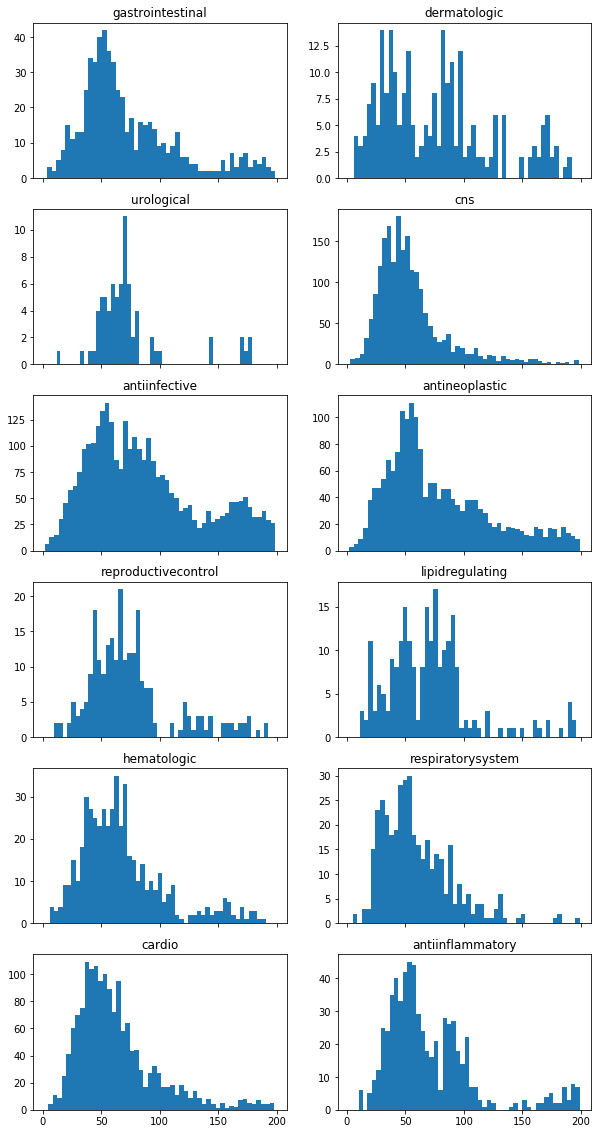

In [59]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 20),nrows=6, sharex ='col')
k = 0
keys = list(smiles_dict.keys())

for i in range(6):
    for j in range(2):
        smileslens = [len(i) for i in smiles_dict[keys[k]]]
        axs[i, j].hist(smileslens,bins=50)
        axs[i,j].set_title(str(keys[k]).format(i+1))
        k +=1

# write SMILES to files

In [63]:
for key in smiles_dict.keys():
    with open(key+"_smiles.csv","w") as outfile:
        for smiles in smiles_dict[key]:
            outfile.write(smiles + '\n')

# make JPEGs of SMILES

In [75]:
#x_mol = Chem.MolFromSmiles(str(p[0]['IsomericSMILES']))

for key in smiles_dict.keys():
    n = 0
    os.makedirs(str(key), exist_ok=True)
    for smiles in smiles_dict[key]:
        x_mol = Chem.MolFromSmiles(str(smiles))
        Draw.MolToFile(x_mol, fileName='./'+str(key)+'/'+str(n)+'.png', size=(500, 500), kekulize=True, wedgeBonds=True, imageType="png")
        n +=1